Danny Ryan
2/22/20
Lab 4: Classification and KNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
file_link = 'https://drive.google.com/uc?export=download&id=1872WZovmmIRvyAra5AENBfUuVetA77ag'
df = pd.read_csv(file_link)
df

,ID,Textbook,Videos,Lecture,Discussion,Problems,Proactive,CodeExperience,MotivatedByFun,MotivatedByChallenge,MotivatedByGrades,MotivatedByJob,Grade
0,1,3,4,3,1,2,4,1,4,3,4,4,D
1,2,2,3,5,4,3,5,1,4,4,4,4,B
2,3,4,5,5,3,5,3,1,5,4,5,5,C
3,4,1,5,3,4,3,1,1,4,3,1,3,F
4,5,4,3,3,2,2,4,2,5,4,5,5,B
5,6,2,3,4,3,4,3,1,4,4,4,3,D
6,7,2,4,3,5,2,5,1,5,4,3,4,B
7,8,3,2,1,2,3,3,1,3,3,2,2,F
8,9,3,4,4,5,3,4,1,5,5,5,5,B
9,10,3,3,4,4,1,5,2,5,3,5,5,B


In [ ]:
df.head(6)

,ID,Textbook,Videos,Lecture,Discussion,Problems,Proactive,CodeExperience,MotivatedByFun,MotivatedByChallenge,MotivatedByGrades,MotivatedByJob,Grade
0,1,3,4,3,1,2,4,1,4,3,4,4,D
1,2,2,3,5,4,3,5,1,4,4,4,4,B
2,3,4,5,5,3,5,3,1,5,4,5,5,C
3,4,1,5,3,4,3,1,1,4,3,1,3,F
4,5,4,3,3,2,2,4,2,5,4,5,5,B
5,6,2,3,4,3,4,3,1,4,4,4,3,D


In [ ]:
X = df[['Textbook', 'Videos', 'Lecture', 'Discussion', 'Problems', 'Proactive', 'CodeExperience', 'MotivatedByFun','MotivatedByChallenge','MotivatedByGrades','MotivatedByJob' ]].values

In [ ]:
X

array([[3, 4, 3, 1, 2, 4, 1, 4, 3, 4, 4],
       [2, 3, 5, 4, 3, 5, 1, 4, 4, 4, 4],
       [4, 5, 5, 3, 5, 3, 1, 5, 4, 5, 5],
       [1, 5, 3, 4, 3, 1, 1, 4, 3, 1, 3],
       [4, 3, 3, 2, 2, 4, 2, 5, 4, 5, 5],
       [2, 3, 4, 3, 4, 3, 1, 4, 4, 4, 3],
       [2, 4, 3, 5, 2, 5, 1, 5, 4, 3, 4],
       [3, 2, 1, 2, 3, 3, 1, 3, 3, 2, 2],
       [3, 4, 4, 5, 3, 4, 1, 5, 5, 5, 5],
       [3, 3, 4, 4, 1, 5, 2, 5, 3, 5, 5],
       [2, 4, 3, 4, 3, 4, 1, 5, 4, 4, 4],
       [2, 3, 4, 3, 2, 4, 2, 3, 3, 3, 2],
       [3, 4, 4, 4, 3, 5, 2, 5, 5, 4, 3],
       [5, 4, 5, 2, 3, 5, 1, 5, 4, 5, 5],
       [3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 3],
       [3, 5, 5, 4, 4, 3, 1, 5, 5, 5, 3],
       [4, 5, 5, 3, 5, 5, 1, 5, 4, 5, 4],
       [2, 5, 3, 4, 2, 4, 1, 4, 5, 4, 4],
       [3, 4, 4, 2, 1, 2, 2, 4, 2, 3, 2],
       [1, 4, 5, 5, 4, 4, 2, 5, 4, 5, 5],
       [1, 4, 2, 3, 5, 2, 5, 5, 5, 4, 5],
       [4, 5, 4, 4, 2, 2, 2, 5, 3, 3, 5],
       [2, 3, 4, 2, 4, 5, 4, 5, 5, 5, 4],
       [4, 3, 4, 5, 2, 5, 1, 5, 3,

In [ ]:
y = df['Grade'].values
y

array(['D', 'B', 'C', 'F', 'B', 'D', 'B', 'F', 'B', 'B', 'C', 'B', 'B',
       'B', 'F', 'C', 'B', 'C', 'D', 'B', 'A', 'B', 'A', 'B', 'D', 'A',
       'C', 'C', 'B', 'C', 'B', 'B', 'A', 'F', 'A', 'C', 'C', 'C', 'C',
       'C', 'B', 'B', 'D', 'D', 'C', 'D', 'C', 'A', 'D', 'B', 'A', 'A',
       'C', 'D', 'C'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=0)
print('Xtrain.shape:', Xtrain.shape)
print('ytrain.shape:', ytrain.shape)
print('Xtest.shape:', Xtest.shape)
print('ytest.shape:', ytest.shape)

Xtrain.shape: (27, 11)
ytrain.shape: (27,)
Xtest.shape: (28, 11)
ytest.shape: (28,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
model.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
ypred = model.predict(Xtest)
ypred

array(['C', 'C', 'B', 'C', 'B', 'B', 'A', 'C', 'C', 'A', 'B', 'B', 'C',
       'A', 'B', 'B', 'C', 'D', 'C', 'D', 'C', 'A', 'C', 'C', 'A', 'B',
       'C', 'C'], dtype=object)

In [ ]:
ypred == ytest

array([False, False,  True,  True,  True, False,  True, False,  True,
       False,  True, False, False,  True,  True,  True,  True, False,
       False, False,  True,  True, False,  True,  True, False, False,
        True])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.5357142857142857

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print(cm)

[[4 0 0 0 0]
 [1 5 1 0 0]
 [0 3 6 1 0]
 [0 0 4 0 0]
 [0 0 2 1 0]]


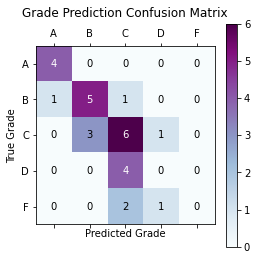

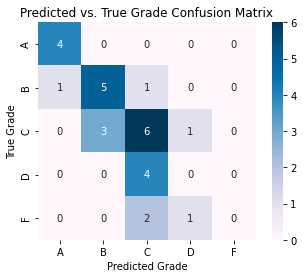

In [ ]:
import seaborn as sns;

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="PuBu",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)

plt.xlabel('Predicted Grade');
plt.ylabel('True Grade')
plt.title('Predicted vs. True Grade Confusion Matrix')
plt.show()


Overall, the most accurete k-value I could find was k=2, which resulted in an 
accurecy of 53.57%. This is better than random chance, as I would assume a 
random chance model to be correct (1/5) or 20% of the time.



My model is best at predicting an A, as in that category my model had a sucess 
rate of 80%, which was the best of every grade. My model was worst at predicting a C, of which it is only accurete 46 percent of the time, 
which was the worst of every grade when compared.
